## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from patsy import dmatrices

## Import Dataset

In [3]:
f = '/Users/shenchingfeng/Documents/1112/機器學習/Homework 1/forestfires.csv'
df = pd.read_csv(f)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [38]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.528854,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.021207,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.526589,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.526589,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.526589,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.526589,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,0.869897,1090.840000


In [48]:
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [74]:
np.log(df['area'] + 1).describe()

count    517.000000
mean       1.111026
std        1.398436
min        0.000000
25%        0.000000
50%        0.418710
75%        2.024193
max        6.995620
Name: area, dtype: float64

## Define X and Y
### Target variable: Area

In [49]:
x = df.drop(['area'], axis = 1).values
y = df['area'].values

In [52]:
print(x)

[[7 5 'mar' ... 51 6.7 0.0]
 [7 4 'oct' ... 33 0.9 0.0]
 [7 4 'oct' ... 33 1.3 0.0]
 ...
 [7 4 'aug' ... 70 6.7 0.0]
 [1 4 'aug' ... 42 4.0 0.0]
 [6 3 'nov' ... 31 4.5 0.0]]


## Prepare the data
### Because there are some skewness, we have to transform the dataset for better use

Skewness of area:  12.846933533934868


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



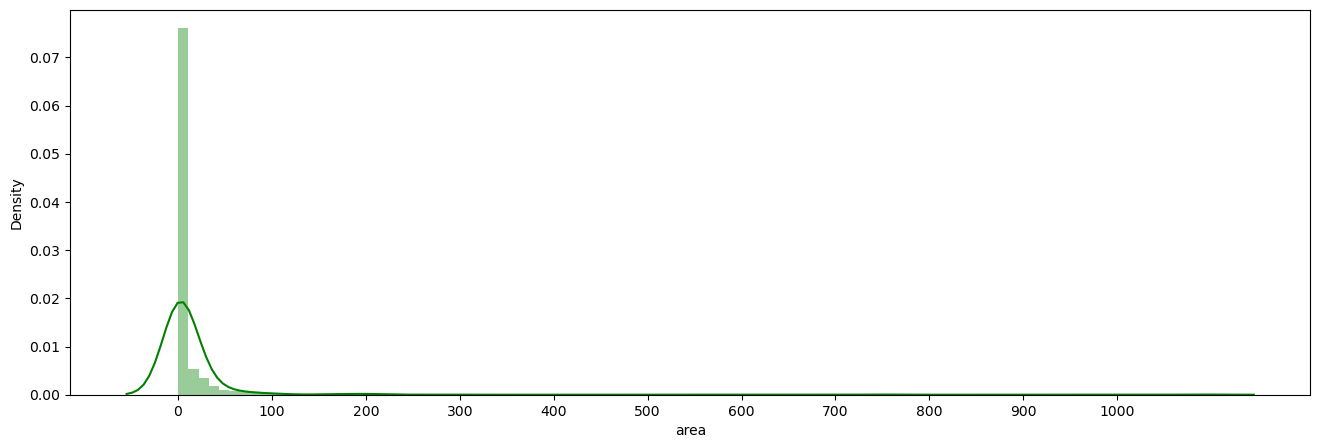

In [72]:
plt.figure(figsize = (16, 5))
sns.distplot(df['area'], color = 'g', bins = 100)
plt.xticks([i for i in range(0, 1100, 100)])
print('Skewness of area: ', df['area'].skew())
plt.show()

Skewness after ln(a + 1) transform:  1.2178376559535011


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



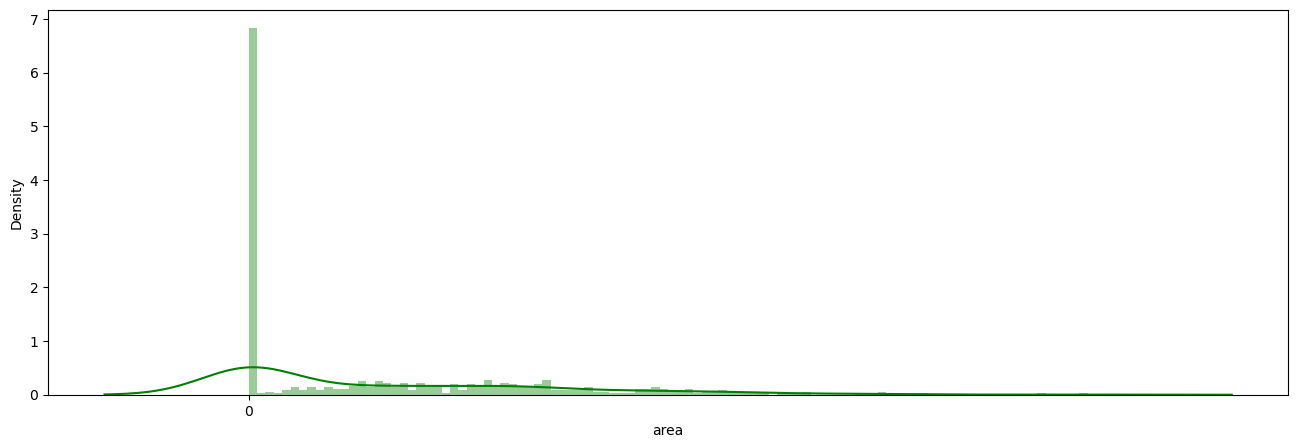

In [90]:
plt.figure(figsize = (16, 5))
sns.distplot(np.log(df['area']+1), color = 'g', bins = 100)
plt.xticks([i for i in range(0, 10, 100)])
print('Skewness after ln(a + 1) transform: ',np.log(df['area'] + 1).skew())
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Skewness after sqrt transform:  4.338705170518166


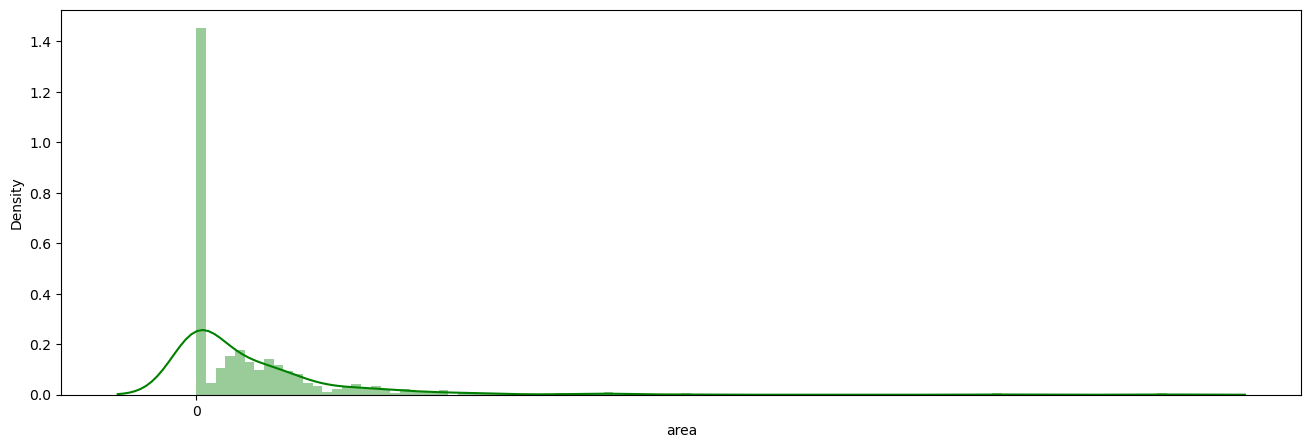

In [91]:
plt.figure(figsize = (16, 5))
sns.distplot(np.sqrt(df['area']), color = 'g', bins = 100)
plt.xticks([i for i in range(0, 10, 100)])
print('Skewness after sqrt transform: ', np.sqrt(df['area']).skew())
plt.show()

In [93]:
np.sqrt(df['area']).describe()

count    517.000000
mean       1.800850
std        3.102071
min        0.000000
25%        0.000000
50%        0.721110
75%        2.563201
max       33.027867
Name: area, dtype: float64

In [40]:
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y

In [37]:
df['rain']

0      0.526589
1      0.526589
2      0.526589
3      0.576832
4      0.526589
         ...   
512    0.526589
513    0.526589
514    0.526589
515    0.526589
516    0.526589
Name: rain, Length: 517, dtype: float64

In [18]:
import plotly.express as px

select_col = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain','area']

for i in select_col:
    fig = px.histogram(
        df,
        x=i,
        histnorm = 'density',  # Set histnorm to 'density' for KDE
        nbins=100,  # Set number of bins for the histogram
        marginal = 'box'
    )
    fig.update_traces(
        opacity=1,  # Set opacity for the histogram bars
    )

    fig.update_layout(
        title=f'{i}',
        xaxis_title=i,
        yaxis_title = 'Density',
        width=1000,
        height=600,
        xaxis_tickfont = dict(size = 20),
        yaxis_tickfont = dict(size = 20)
    )
    fig.update_layout(
        title = {
        'font': {'size': 40, 'family': 'Gulliver'},
        'x': 0.5
        }
    )
    fig.show()
    fig.write_image(f"{i}.png")


In [75]:
rain_V_area = df[['rain', 'area']]
result_rain = rain_V_area[rain_V_area['rain'] != 0]
result_rain


,rain,area
3,0.2,0.00
243,1.0,0.00
286,0.2,0.00
499,6.4,10.82
500,0.8,0.00
501,0.8,0.00
502,0.4,0.00
509,1.4,2.17


In [77]:
rain_V_area = df[['rain', 'area']]
result_rain = rain_V_area[rain_V_area['area'] != 0]
result_rain.head(50)

,rain,area
138,0.0,0.36
139,0.0,0.43
140,0.0,0.47
141,0.0,0.55
142,0.0,0.61
143,0.0,0.71
144,0.0,0.77
145,0.0,0.90
146,0.0,0.95
147,0.0,0.96


In [54]:
from scipy.stats import zscore

area_outliers = df[abs(zscore(np.log(df['area']+1))) >= 2.58]

area_outliers

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
234,4,5,sep,sat,92.5,121.1,674.4,8.6,17.7,25,3.1,0.0,154.88
235,8,6,aug,sun,91.4,142.4,601.4,10.6,19.6,41,5.8,0.0,196.48
236,2,2,sep,sat,92.5,121.1,674.4,8.6,18.2,46,1.8,0.0,200.94
237,1,2,sep,tue,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88
238,6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84
377,2,2,aug,sat,93.7,231.1,715.1,8.4,21.9,42,2.2,0.0,174.63
415,8,6,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28
420,8,8,aug,wed,91.7,191.4,635.9,7.8,26.2,36,4.5,0.0,185.76
479,7,4,jul,mon,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53


In [17]:
def area_cat(area):
    if area == 0.0:
        return "No damage"
    elif area <= 1:
        return "low"
    elif area <= 25:
        return "moderate"
    elif area <= 100:
        return "high"
    elif area >= 100:
        return "very high"

df['damage_category'] = df['area'].apply(area_cat)
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,damage_category
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,No damage
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,No damage
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,No damage
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,No damage
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,No damage


In [18]:
high_damage = df[df['damage_category'].isin(['high', 'very high'])]
high_damage.sort_values('month')

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,damage_category
469,6,3,apr,sun,91.0,14.6,25.6,12.3,13.7,33,9.4,0.0,61.13,high
211,7,4,aug,sat,93.5,139.4,594.2,20.3,5.1,96,5.8,0.0,26.00,high
498,6,5,aug,tue,96.1,181.1,671.2,14.3,33.3,26,2.7,0.0,40.54,high
493,1,3,aug,fri,95.9,158.0,633.6,11.3,27.5,29,4.5,0.0,43.32,high
488,4,4,aug,tue,95.1,141.3,605.8,17.7,19.4,71,7.6,0.0,46.70,high
484,2,5,aug,sun,94.9,130.3,587.1,14.1,33.1,25,4.0,0.0,26.43,high
457,1,4,aug,wed,91.7,191.4,635.9,7.8,19.9,50,4.0,0.0,82.75,high
420,8,8,aug,wed,91.7,191.4,635.9,7.8,26.2,36,4.5,0.0,185.76,very high
415,8,6,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28,very high
388,6,4,aug,fri,94.8,227.0,706.7,12.0,23.3,34,3.1,0.0,28.74,high


In [93]:
# assuming your data is stored in a DataFrame named 'df'
area_by_month = df.groupby(['month'])['area'].mean()

area_by_month.reset_index()

,month,area
0,apr,8.891111
1,aug,12.489076
2,dec,13.330000
3,feb,6.275000
4,jan,0.000000
5,jul,14.369687
6,jun,5.841176
7,mar,4.356667
8,may,19.240000
9,nov,0.000000


In [19]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,damage_category
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,No damage
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,No damage
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,No damage
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,No damage
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,No damage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,moderate
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,high
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,moderate
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,No damage


In [28]:
X = df.drop(columns = ['area','damage_category', 'month', 'day'])
y = np.log(df['area']+1)
X_constant = sm.add_constant(X)

# Build OLS model 
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   area   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.317
Date:                Fri, 24 Mar 2023   Prob (F-statistic):              0.218
Time:                        23:13:50   Log-Likelihood:                -899.83
No. Observations:                 517   AIC:                             1822.
Df Residuals:                     506   BIC:                             1868.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0186      1.382      0.013      0.989      -2.696       2.733
X              0.0403      0.032      1.269      0.205      -0.022       0.103
Y              0.0155      0.060      0.258      0.796      -0.102       0.133
FFMC           0.0074      0.014      0.510      0.610      -0.021       0.036
DMC            0.0012      0.001      0.816      0.415      -0.002       0.004
DC             0.0003      0.000      0.909      0.364      -0.000       0.001
ISI           -0.0243      0.017     -1.434      0.152      -0.057       0.009
temp           0.0014      0.017      0.081      0.935      -0.033       0.035
RH            -0.0059      0.005     -1.137      0.256      -0.016       0.004
wind           0.0765      0.037      2.089      0.037       0.005       0.148
rain           0.0779      0.212      0.367      0.714      -0.339       0.495
==============================================================================
Omnibus:                       87.035   Durbin-Watson:                   0.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.352
Skew:                           1.158   Prob(JB):                     1.35e-28
Kurtosis:                       3.773   Cond. No.                     1.40e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Split the dataset in training set and test set

## Train the model on the training set

## Predict the test set results

## Evaluate the model